读入数据

In [9]:
import numpy as np
axis = np.array([[5,2],[1,2],[2,1],[6,2],
                [1,1],[3,1],[7,-1],[5,-1]
                ])
                
axis_x = axis[:,0]
axis_y = axis[:,1]
axis_x


array([5, 1, 2, 6, 1, 3, 7, 5])

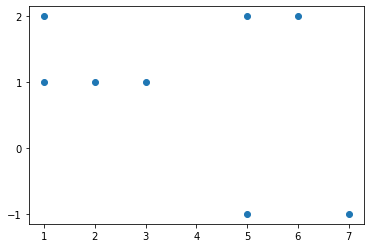

In [10]:
import matplotlib.pyplot as plt
_yticks = [i for i in range(-1,3,1) ]
plt.yticks(_yticks)
plt.scatter(axis_x,axis_y)
plt.show()

In [11]:
axis

array([[ 5,  2],
       [ 1,  2],
       [ 2,  1],
       [ 6,  2],
       [ 1,  1],
       [ 3,  1],
       [ 7, -1],
       [ 5, -1]])

顺序聚类

In [20]:
label=[0,1,1,0,1,1,0,0]
label

[0, 1, 1, 0, 1, 1, 0, 0]

Kmeans

In [17]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
y_pred_kmeans = clf.fit_predict(axis)
# 输出完整Kmeans函数，包括很多省略参数
print('k均值模型:\n',clf)
# 输出聚类预测结果，20行数据，每个y_pred对应X一行或一个球员，聚成3类，类标为0、1、2
print('聚类结果:\n',y_pred_kmeans)


k均值模型:
 KMeans(n_clusters=2)
聚类结果:
 [0 1 1 0 1 1 0 0]


谱聚类

In [18]:
from sklearn.cluster import SpectralClustering as sc
clf= sc(gamma=1,n_clusters=2)
y_pred_sc = clf.fit_predict(axis)
# 输出完整Kmeans函数，包括很多省略参数
print('谱聚类模型:\n',clf)
# 输出聚类预测结果，20行数据，每个y_pred对应X一行或一个球员，聚成3类，类标为0、1、2
print('聚类结果:\n',y_pred_sc)

谱聚类模型:
 SpectralClustering(gamma=1, n_clusters=2)
聚类结果:
 [0 1 1 0 1 1 0 0]


计算距离矩阵

In [24]:
n,m=axis.shape
D = np.zeros([n,n])
for i in range(n):
    for j in range(i+1,n):
        d =  axis[i,:]-axis[j,:]
        D[i,j] = np.sqrt(np.dot(d,d))
        D[j,i] = D[i,j]
D


array([[0.        , 4.        , 3.16227766, 1.        , 4.12310563,
        2.23606798, 3.60555128, 3.        ],
       [4.        , 0.        , 1.41421356, 5.        , 1.        ,
        2.23606798, 6.70820393, 5.        ],
       [3.16227766, 1.41421356, 0.        , 4.12310563, 1.        ,
        1.        , 5.38516481, 3.60555128],
       [1.        , 5.        , 4.12310563, 0.        , 5.09901951,
        3.16227766, 3.16227766, 3.16227766],
       [4.12310563, 1.        , 1.        , 5.09901951, 0.        ,
        2.        , 6.32455532, 4.47213595],
       [2.23606798, 2.23606798, 1.        , 3.16227766, 2.        ,
        0.        , 4.47213595, 2.82842712],
       [3.60555128, 6.70820393, 5.38516481, 3.16227766, 6.32455532,
        4.47213595, 0.        , 2.        ],
       [3.        , 5.        , 3.60555128, 3.16227766, 4.47213595,
        2.82842712, 2.        , 0.        ]])

In [25]:
label0=[0,3,6,7]
label1=[1,2,4,5]
min_d = D[0][1]
for i in label0:
    for j in label1:
        min_d = min(D[i][j],min_d)
max_d0=0
for i in label0:
    for j in label0:
        if(i!=j):
            max_d0=max(D[i][j],max_d0)
max_d1=0
for i in label0:
    for j in label0:
        if(i!=j):
            max_d1=max(D[i][j],max_d1)
print("min_d=",min_d)
print("max_d0=",max_d0)
print("min_d1=",max_d1)
max_d = max(max_d0,max_d1)
J_Dunn = min_d/max_d
print("J_Dunn",J_Dunn)



min_d= 2.23606797749979
max_d0= 3.605551275463989
min_d1= 3.605551275463989
J_Dunn 0.6201736729460423


In [30]:
from sklearn import metrics
from pandas.core.frame import DataFrame
df = DataFrame(axis)
score = metrics.davies_bouldin_score(df, label)
print("Davies-Bouldin-score: ", score)

Davies-Bouldin-score:  0.6331473961991908
